<a href="https://colab.research.google.com/github/JD-man/DeepLearning_Study/blob/main/Chapter6/Chapter_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 시퀀스 문제

# 머신 러닝 문제 중 하나, 특징 변수의 순서가 예측에 중요한 비중을 차지하는 문제.
# 자연어 처리, 감성 분석, 기계 번역, 다음 단어 예측
# 시계열 예측
# 문장을 읽을 때 단어의 순서, 즉 시퀀스를 고려한다.

In [ ]:
# 자연어 처리

# 1950년대 초반 : 규칙 기반 방식, 이 방식은 한 언어의 규칙을 다른 언어의 규칙으로 변환할 수 없어 확장성이 부족했다.
# 최근 : 신경망이 적용. 여러 IT 대기업 등에 사용됨

# 감성분석 또한 자연어 처리 분야로 문장의 긍정도를 판별하는 기법이다. 회구가 아닌 분류(긍정, 중립, 부정)으로 접근한다.
# 고객 리뷰 분석, 뉴스의 감성 분석을 통한 주식 거래 등에 사용된다.

In [ ]:
# 감성 분석이 어려운 이유

# 1. 아래의 두 fire를 보면 1번은 부정, 2번은 긍정적이다. 감성분석은 단어라도 문맥에 따라 전혀 다른 의미를 가질 수 있어서 어렵다.
#   The building is on fire
#   I am on fire today

# 2. 비꼬는 어투를 감지하기 힘들다.
# 내 짐을 잃어버려서 참으로 고맙네요! 고객 서비스가 정말 최고에요!
# 단어는 긍정적이지만 전체적인 감성은 부정적이다.

In [ ]:
# RNN 신경망

# 다중 레이어 퍼셉트론, 전방향 신경망, CNN 등은 이미지와 같이 고정된 벡터를 입력받아 고정된 형태의 또 다른 벡터를 출력한다.
# 고정된 벡터만 다루는 것은 시퀀스 데이터에 적합하지 않다.
# 시퀀스 데이터를 다루려면 데이터가 등장한 순서 그대로 읽어들여 하나씩 처리해야한다. RNN은 이 동작을 수행한다.

In [ ]:
# RNN의 구조

# 한 문장을 단어 여러 단위로 나눠 RNN에 입력한다.
# 나눈 단어들은 레이어의 입력데이터가 된다.
# RNN의 레이어는 출력을 다음 레이어로 전달한다. 이러한 중간 출력을 은닉 상태(hidden state)라고 한다.
# 은닉 상태를 사용해 시퀀스 데이터의 중간 결과를 기억할 수 있다.

# 레이어는 시간 t의 입력과 시간 t-1의 은닉상태를 입력받는다.
# RNN 레이어는 이 두 입력을 더한 다음 tanh 함수를 적용하고 출력을 낸다. 그 출력은 다음 레이어에 전달한다.

# tanh함수는 입력값을 -1 ~ 1 사이로 줄이는 역할을 한다.
# 가중치가 빠르게 발산하지 않도록 보장하므로 입력과 은닉 상태를 조합하는 비선형 함수로 사용하기에 적당하다.
# 손쉽게 미분할 수 있다는 장점도 있다.

# 맨 마지막 레이어는 시그모이드 함수를 적용한다.
# 시그모이드 함수는 0 ~ 1 사이 결과값을 출력해 클래스 예측 확률을 계산한다.

In [ ]:
# RNN의 단기의존성과 장기의존성

# The movie is good today
#  1   2    3   4     5
# RNN은 이 5개의 입력을 받고 출력 전 네번째 입력에서 영화에 대한 감성을 알 수 있다.
# 이 시퀀스 데이터는 단기의존성(short dependency)가 있다.

# I really liked the movie but I was disappointed in the service and cleanlinesee of the cinema. ~~~~
# 영화에 관해서 가장 중요한 단어인 liked the movie 부분은 출력과 거리가 멀다.
# 이 시퀀스 데이터는 장기의존성이 있다.

# RNN은 장기 의존성을 가진 시퀀스에 적합하지 않다. 단기 기억력은 좋지만 장기 기억력은 좋지 않다.
# 경사 소실 문제가 있기 때문이다.

In [ ]:
# 경사 소실 문제 (vanishing gradient problem)

# 역전파와 같이 경사를 사용하는 기법으로 심층 신경망을 훈련시킬 때 경사 소실 문제가 발생한다.
# 실제로는 레이어를 거슬러 올라가면서 손실이 잘 전달되지 않는 경향이 있다.
# 이러면 레이어의 가중치를 크게 바꾸지 못한다. 작은 손실 값으로는 앞 단에 있는 레이어를 훈련시키기 어렵다.
# CNN에서는 경사 소실 문제가 없다. 하지만 시퀀스 데이터와 RNN에서는 경사 소실 문제가 지대한 영향을 미친다.
# 경사 소실 문제로 인해 앞 단 레이어를 제대로 학습시킬 수 없으므로 장기 의존성에 취약하다는 말이다.
# 경사 소실 문제를 해결하기 위해 RNN을 변형한 LSTM 신경망이 제안됐다.

In [ ]:
# LSTM 신경망

# I loved this movie! The action sequences were on point and the acting was terrific. Highly recommended!
# 위의 문장에서 중요한 부분은 loved, on point, terrific, Highly recommended이다.
# RNN은 모든 문장을 기억하려하므로 장기의존성에 약하지만, LSTM은 중요 정보를 선별적으로 기억해 대처한다.

In [ ]:
# LSTM의 내부구조

# LSTM은 은닉 상태와 셀 상태가 있다. 셀 상태는 현재 메모리라고 볼 수 있다.
# 특정 시점에서 기억해야할 중요한 정보를 다음 시점으로 전달한다.
# 은닉 상태는 LSTM 전바에 걸쳐 기억하는 전체 메모리다.

# 망각 게이트(forget gate), 입력 게이트(input gate), 출력 게이트(output gate)를 통해 셀상태와 은닉상태를 관리한다.

In [ ]:
# 망각 게이트는 이전 은닉 상태와 현재 입력 벡터를 합쳐 시그모이드 함수에 전달한다.
# 결과가 0이면 망각 1이면 기억이다.

# 입력 게이트는 현재 셀 상태로 전달할 정보량을 조절한다.
# 이전 은닉상 상태와 현재 입력 벡터를 합쳐 복사해 시그모이드 함수와 쌍곡탄젠트 함수에 전달하고 결과를 곱한다.

# 현재 셀상태는 (이전 셀상태 * 망각 게이트값) + 입력게이트 값 으로 계산된다.

# 출력 게이트는 은닉 상태에 남길 정보량을 조절한다.
# 이전 은닉 상태와 현재 입력을 합쳐 시그모이드 함수에 전달한다.
# 그 다음 현재 셀 상태를 가져다 tanh함수에 적용한다.
# 이 두 결과를 곱해서 현재 은닉 상태를 계산하고 다음 유닛으로 보낸다.

# 이론을 이해하는 것도 좋지만 이론과 통찰을 연결 짓는게 쉽지 않을 수 있다(도움도안됨)
# LSTM을 대략적으로만 이해하고 블랙박스 알고리즘처럼 적용하는 편이 더 효율적이다.

In [ ]:
# IMDb 영화 리뷰 데이터셋

# 유명 사이트에 달린 영화 리뷰 데이터셋이다. 긍정은 1, 부정은 0이다.
# 케라스에서 IMDb 데이터셋을 기본으로 제공한다.

from keras.datasets import imdb
training_set, testing_set = imdb.load_data(index_from = 3)
X_train, y_train = training_set
X_test, y_test = testing_set

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# 맨 처음 리뷰를 예시로 출력

print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# 단어가 아닌 숫자로 나오는 이유는 단어를 숫자로 이미 인코딩했기 때문이다.
# 케라스에 내장된 딕셔너리를 이용해 원본을 출력할 수 있다.

word_to_id = imdb.get_word_index()
word_to_id = {key:(value+3) for key, value in word_to_id.items()}
word_to_id["<Pad>"] = 0
word_to_id["<START>"] = 1
id_to_word = {value:key for key, value in word_to_id.items()}

print(' '.join(id_to_word[id] for id in X_train[159]))

<START> a rating of 1 does not begin to express how dull depressing and relentlessly bad this movie is


In [ ]:
# 이 리뷰에 대한 감성을 출력해본다.
print(y_train[159])

0


In [ ]:
# 단어의 벡터 표현

# 원핫 인코딩
# 자연어 처리에 원핫인코딩을 적용하면 단어의 개수가 축의 개수가 된다.
# Happy / Excited / Happy, excited 세개의 표현이 있을때
# Happy (1,0) / Excited (0,1) / Happy, excited (1,1) 이 된다.

# 영어 사전만 봐도 단어가 수만개는 넘기 때문에 수만 차원의 벡터를 만들어야한다.
# 대부분의 단어나 문장이 잘해야 한번 등장하므로 빈값(0)이 많은 희소벡터(sparse vector)가 될 가능성이 높다.
# 희소벡터로는 신경망을 훈련시키기 어렵고, 단어 사이의 유사도를 고려할 수 없다. 단어의 중요정보를 잃게 된다.

In [ ]:
# 단어 임베딩

# 단어 임베딩은 단어를 더 나은 벡터로 표현하는 방법을 학습하는 기법이다.
# 벡터 차원이 더 작고 유사한 단어들이 서로 가깝게 놓이기 때문에 더 낫다.
# 단어 임베딩은 지도학습으로 훈련시키고 케라스 API로 직접 훈련시킬 수 있다.

In [ ]:
# 모델 아키텍쳐

# 입력 -> 단어 임베딩 레이어 -> LSTM 레이어 -> Dense 레이어 -> 출력

# 입력
# 영화 리뷰 데이터셋의 문장은 길이가 제각각 다르다. 신경망의 길이는 일정하므로 이 문제를 해결해야한다.

# 단어 임베딩 레이어
# 첫번째 레이어로 단어 임베딩 레이어를 사용한다.
# 단어를 벡터로 표현하는 방법을 학습하는 기법이다.
# 단어를 입력받아 단어를 표현하는 벡터를 출력한다.
# 유사한 단어들의 벡터는 서로 가까워야 한다.

# LSTM 레이어
# 단어 임베딩 레이어가 출력한 단어 벡터를 입력받아 벡터의 긍부정을 분류하는 방법을 학습한다.

# 완전연결레이어, 출력
# 완전연결레이어에서 LSTM 레이어가 출력한 결과를 처리하고 출력에서 0 ~ 1사이 값으로 긍부정을 판단한다.

In [ ]:
from keras.datasets import imdb

# imdb의 load_data에서 num_words를 지정할 수 있다. 데이터 셋에 저장된 순서대로 단어 n개를 가져온다.
# n이 낮으면 정확도는 낮지만 빠르게 훈련시킬 수 있다.

training_set, testing_set = imdb.load_data(num_words=10000)
X_train, y_train = training_set
X_test, y_test = testing_set

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# 데이터 크기 출력

print("Number of training samples = {}".format(X_train.shape[0]))
print("Number of training samples = {}".format(X_test.shape[0]))

Number of training samples = 25000
Number of training samples = 25000


In [ ]:
# 제로 패딩

# 입력을 정해진 크기의 벡터로 입력해야한다.
# 영화 리뷰의 최대 길이를 maxlen 매개변수로 정의해 해결한다.
# maxlen보다 긴 리뷰는 자르고 maxlen보다 짧은 리뷰에는 0을 채운다. 이 과정을 제로 패딩이라고 한다.

# 케라스의 preprocessing 모듈의 sequence를 사용해 적용한다.

from keras.preprocessing import sequence

X_train_padded = sequence.pad_sequences(X_train, maxlen = 100)
X_test_padded = sequence.pad_sequences(X_test, maxlen = 100)

print("X_train vector shape = {}".format(X_train_padded.shape))
print("X_test vector shape = {}".format(X_test_padded.shape))

X_train vector shape = (25000, 100)
X_test vector shape = (25000, 100)


In [ ]:
# from keras.models import Sequential

# # 모델 생성
# model = Sequential()

In [ ]:
# # 임베딩 레이어 생성
# # input_dim : 임베딩 레이어의 입력 벡터 차원을 지정한다. 데이터셋에 있는 단어의 고유 개수와 동일해야한다. imdb의 num_word값을 그대로 사용한다.
# # output_dim : 워드 임베딩 레이어의 출력 벡터 차원을 지정한다.
# from keras.layers import Embedding

# model.add(Embedding(input_dim = 10000, output_dim = 128))

In [ ]:
# # LSTM 레이어 생성
# # units : LSTM 레이어의 반복 유닛 수를 지정한다. 많을수록 모델 복잡도가 증가, 훈련 시간 증가, 과적합 발생 확률 증가.
# # activation : 셀 상태와 은닉 상태에 사용할 활성화 함수를 지정한다. 지정안하면 tanh 함수.
# # recurrent_activation : 망각, 입력, 출력 게이트에 적용할 활성화 함수를 지정한다. 안하면 시그모이드 함수.

# from keras.layers import LSTM

# model.add(LSTM(units = 128))

In [ ]:
# # 마지막으로 Dense 레이어 추가

# from keras.layers import Dense
# model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# # 모델 확인

# model.summary()

In [ ]:
# # 컴파일 후 훈련

# model.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop')
# scores = model.fit(x=X_train_padded, y = y_train, batch_size = 128, epochs = 10, validation_data=(X_test_padded, y_test))

In [ ]:
# for key in scores.history.keys():
#   print(key)

In [ ]:
# # score에는 훈련 손실, 검증 손실, 에폭별 손실 값 등을 담은 파이썬 딕셔너리이다.
# # 결과를 출력해본다.

# import matplotlib.pyplot as plt

# plt.plot(range(1,11), scores.history['loss'], label = 'Training Loss')
# plt.plot(range(1,11), scores.history['val_loss'], label = 'Validation Loss')
# plt.axis([1, 10, 0, 1])
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Train and Validation Accuracy using RMSprop Optimizer')
# plt.legend()
# plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
model4 = Sequential()
model4.add(Embedding(input_dim = 10000, output_dim = 128))
model4.add(LSTM(units = 128))
model4.add(Dense(units = 1, activation = 'sigmoid'))
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
scores4 = model4.fit(x=X_train_padded, y = y_train, batch_size = 128, epochs = 10, validation_data=(X_test_padded, y_test))

Epoch 1/10
196/196 [==============================] - 10s 33ms/step - loss: 0.5362 - accuracy: 0.7085 - val_loss: 0.3451 - val_accuracy: 0.8500
Epoch 2/10
196/196 [==============================] - 6s 28ms/step - loss: 0.2665 - accuracy: 0.8958 - val_loss: 0.3470 - val_accuracy: 0.8495
Epoch 3/10
196/196 [==============================] - 6s 29ms/step - loss: 0.1883 - accuracy: 0.9321 - val_loss: 0.3840 - val_accuracy: 0.8380
Epoch 4/10
196/196 [==============================] - 6s 28ms/step - loss: 0.1325 - accuracy: 0.9521 - val_loss: 0.4157 - val_accuracy: 0.8350
Epoch 5/10
196/196 [==============================] - 6s 28ms/step - loss: 0.0916 - accuracy: 0.9701 - val_loss: 0.5237 - val_accuracy: 0.8316
Epoch 6/10
196/196 [==============================] - 6s 28ms/step - loss: 0.0751 - accuracy: 0.9753 - val_loss: 0.6310 - val_accuracy: 0.8252
Epoch 7/10
196/196 [==============================] - 6s 29ms/step - loss: 0.0676 - accuracy: 0.9783 - val_loss: 0.6873 - val_accuracy: 0.823

In [ ]:
for key in scores4.history.keys():
  print(key)

loss
accuracy
val_loss
val_accuracy


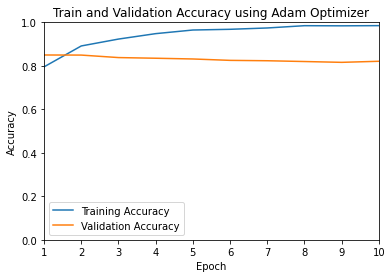

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), scores4.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(1,11), scores4.history['val_accuracy'], label = 'Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using Adam Optimizer')
plt.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 7s 25ms/step - loss: 0.5835 - accuracy: 0.6827 - val_loss: 0.3476 - val_accuracy: 0.8508
Epoch 2/10
196/196 [==============================] - 4s 23ms/step - loss: 0.3098 - accuracy: 0.8743 - val_loss: 0.4109 - val_accuracy: 0.8292
Epoch 3/10
196/196 [==============================] - 4s 23ms/step - loss: 0.2526 - accu

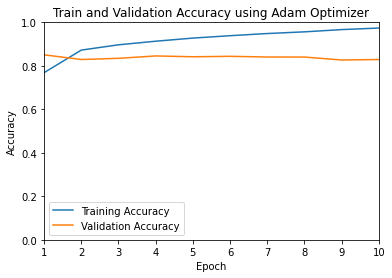

In [ ]:
# optimizer를 RMSprop 으로 변경
model5 = Sequential()
model5.add(Embedding(input_dim = 10000, output_dim = 128))
model5.add(LSTM(units = 128))
model5.add(Dense(units = 1, activation = 'sigmoid'))
model5.summary()
model5.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics=['accuracy'])
scores5 = model5.fit(x=X_train_padded, y = y_train, batch_size = 128, epochs = 10, validation_data=(X_test_padded, y_test))

plt.plot(range(1,11), scores5.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(1,11), scores5.history['val_accuracy'], label = 'Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using Adam Optimizer')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


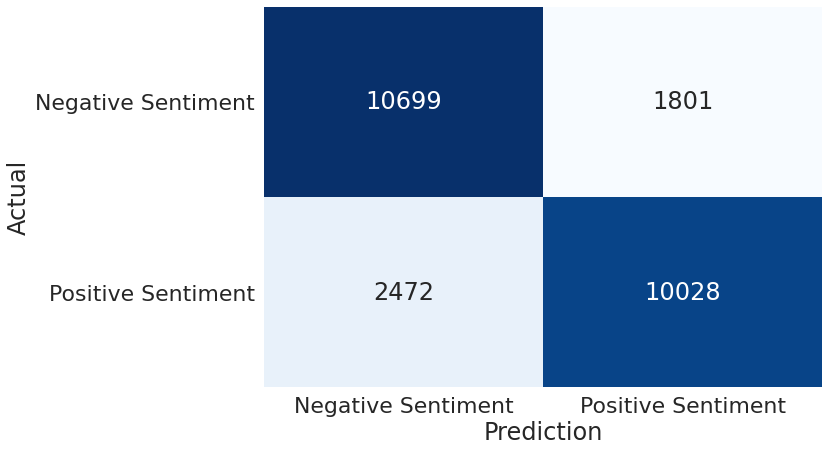

In [ ]:
# 옵티마이저가 adam과 RMSprop으로 다른데, 책에는 adam은 검증정확도가 80%, RMSprop은 80%로 adam이 더 과적합됐다고 한다.
# RMSprop 데이터로 혼동행렬을 만들어 본다

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (10,7))
sns.set(font_scale = 2)
y_test_pred = model5.predict_classes(X_test_padded)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Negative Sentiment', 'Positive Sentiment'], yticklabels=['Negative Sentiment', 'Positive Sentiment'], cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

In [ ]:
# 진음성과 진양성 비율

n = 10699 + 10028
d = n + 2472 + 1801

print(n/d * 100)

82.908


In [ ]:
# 이 모델은 82%정도로 감성을 분석한다.

# 모델이 잘못 분류한 결과
# 미묘한 표현. 비꼬는 표현
# 다분히 중립적인 표현. 다른사람을 인용하는 표현
# 다른 리뷰어를 공격하는 내용
# 등이 있다.